In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image

In [2]:
def reduce_intensity_levels(image, levels):
    """
    Reduce the number of intensity levels in a grayscale image.
    Levels should be a power of 2 (e.g., 2, 4, 8, 16, 32, 64, 128).
    """
    if levels < 2 or levels > 256 or (levels & (levels - 1)) != 0:
        raise ValueError("Number of levels must be a power of 2 between 2 and 256.")

    # Convert image to grayscale if it isn't already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the factor to reduce intensity levels
    factor = 256 // levels
    # Reduce levels by scaling and rounding
    reduced_image = (image // factor) * factor
    return reduced_image

In [13]:
def spatial_averaging(image, kernel_size):
    """
    Task 2: Perform spatial averaging with specified kernel size.
    """
    # Convert image to grayscale if it isn't already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply averaging using cv2.blur, which supports even kernel sizes
    averaged = cv2.blur(image, (kernel_size, kernel_size))

    return averaged.astype(np.uint8)

In [4]:
def rotate_image(image, angle):
    """
    Rotate an image by a specified angle (in degrees).
    """
    # Get image dimensions
    (h, w) = image.shape[:2]
    # Calculate the center of the image
    center = (w // 2, h // 2)

    # Compute the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Calculate the new bounding dimensions to avoid cropping
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to account for translation
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, M, (new_w, new_h))
    return rotated_image

In [5]:
def reduce_spatial_resolution(image, block_size):
    """
    Reduce spatial resolution by replacing each block_size x block_size block
    with its average value.
    """
    if block_size < 1:
        raise ValueError("Block size must be a positive integer.")

    # Convert image to grayscale if it isn't already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get image dimensions
    h, w = image.shape
    # Initialize output image
    output = np.zeros((h, w), dtype=np.uint8)

    # Process each block
    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            # Extract the block
            block = image[i:i+block_size, j:j+block_size]
            # Compute the average
            block_mean = np.mean(block).astype(np.uint8)
            # Assign the average to all pixels in the block
            output[i:i+block_size, j:j+block_size] = block_mean

    return output

In [28]:
def display_results(original_image, results_dict, title="Image Processing Results"):
    """
    Display all results in a comprehensive figure.
    """
    n_results = len(results_dict) + 1  # +1 for original
    cols = 4
    rows = (n_results + cols - 1) // cols

    plt.figure(figsize=(16, 4 * rows))

    # Display original image
    plt.subplot(rows, cols, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display processed results
    for idx, (name, image) in enumerate(results_dict.items(), 2):
        plt.subplot(rows, cols, idx)
        plt.imshow(image, cmap='gray')
        plt.title(name)
        plt.axis('off')

    plt.suptitle(title, fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

In [24]:
def main():
    # Load the input image
    input_image = cv2.imread('input_image.jpg')
    if input_image is None:
        raise FileNotFoundError("Input image not found. Please provide 'input_image.jpg'.")

    # Convert original image to grayscale for display
    original_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) if len(input_image.shape) == 3 else input_image

    # Task 1: Reduce intensity levels
    task1_results = {}
    intensity_levels = [2, 4, 8]
    for levels in intensity_levels:
        reduced = reduce_intensity_levels(input_image, levels)
        task1_results[f'Intensity {levels} Levels'] = reduced
        cv2.imwrite(f'reduced_intensity_{levels}_levels.jpg', reduced)
    display_results(original_gray, task1_results, title="Task 1: Intensity Level Reduction")

    # Task 2: Spatial averaging with specified kernel sizes
    task2_results = {}
    kernel_sizes = [3, 10, 20]
    for k in kernel_sizes:
        averaged = spatial_averaging(input_image, k)
        task2_results[f'Spatial Average {k}x{k}'] = averaged
        cv2.imwrite(f'spatial_average_{k}x{k}.jpg', averaged)
    display_results(original_gray, task2_results, title="Task 2: Spatial Averaging")

    # Task 3: Rotate image
    task3_results = {}
    angles = [45, 90]
    for angle in angles:
        rotated = rotate_image(input_image, angle)
        # Convert to grayscale for display consistency
        rotated_gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY) if len(rotated.shape) == 3 else rotated
        task3_results[f'Rotated {angle} Degrees'] = rotated_gray
        cv2.imwrite(f'rotated_{angle}_degrees.jpg', rotated)
    display_results(original_gray, task3_results, title="Task 3: Image Rotation")

    # Task 4: Reduce spatial resolution
    task4_results = {}
    block_sizes = [3, 5, 7]
    for b in block_sizes:
        reduced_res = reduce_spatial_resolution(input_image, b)
        task4_results[f'Reduced Resolution {b}x{b}'] = reduced_res
        cv2.imwrite(f'reduced_resolution_{b}x{b}.jpg', reduced_res)
    display_results(original_gray, task4_results, title="Task 4: Spatial Resolution Reduction")

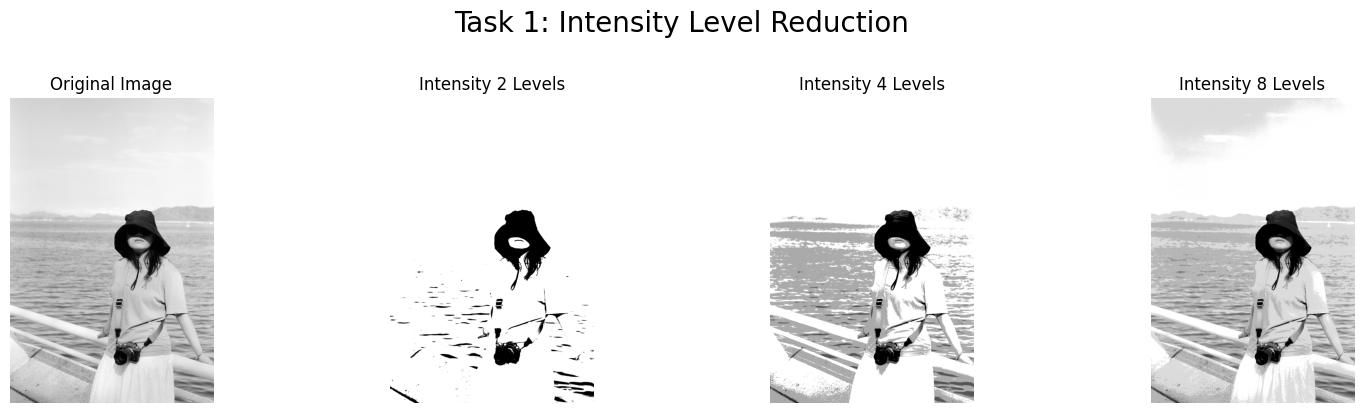

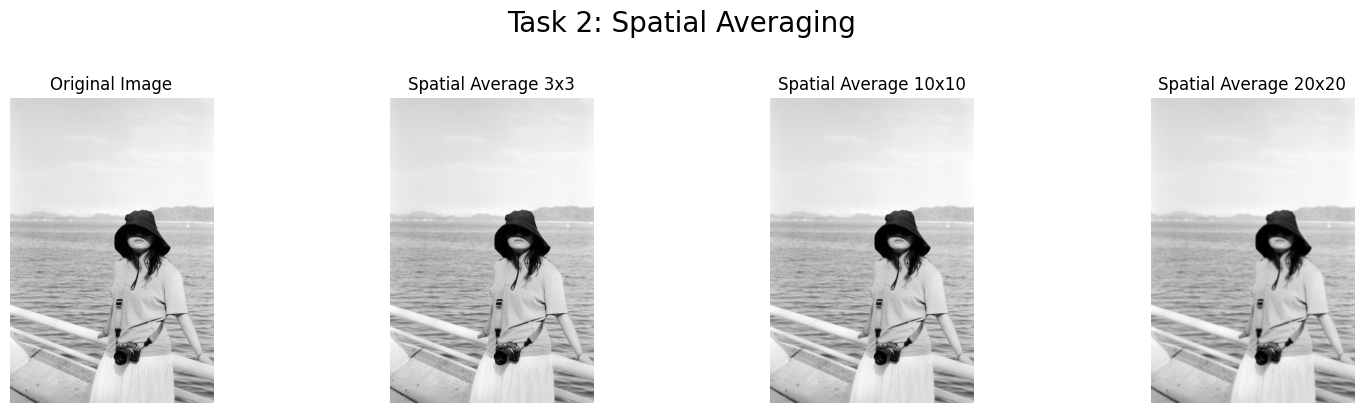

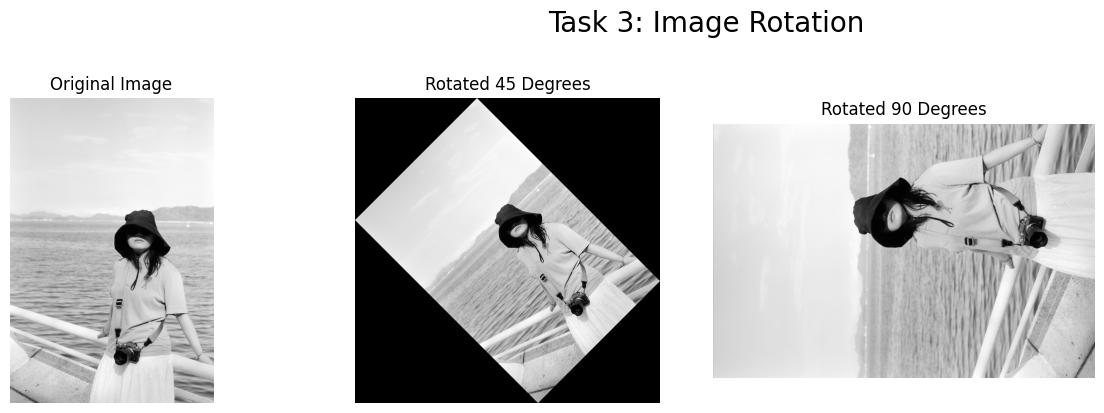

In [ ]:
if __name__ == "__main__":
    main()